<p align="center">
  <span style="color:Navy; font-size:200%; font-weight:bold; vertical-align:middle;">
    Temas Selectos: Python para Ciencias de la Tierra
  </span>
  <img src="attachment:LOGO_ENCIT.png" alt="ENCiT" width="160" style="vertical-align:middle; margin-left:20px;"/>
</p>
<p align="center" style="line-height:1.2;">
  <span style="color:RoyalBlue; font-size:160%;">Tema 3: An√°lisis espacial</span><br/>
  <span style="color:DodgerBlue; font-size:140%;">Notebook 1: Geopandas </span><br/>
  <span style="font-size:100%;color:forestgreen"> Escuela Nacional de Ciencias de la Tierra  |  Semestre 2026-I</span>
</p>

---

### ¬øPor qu√© usar GeoPandas en Ciencias de la Tierra?

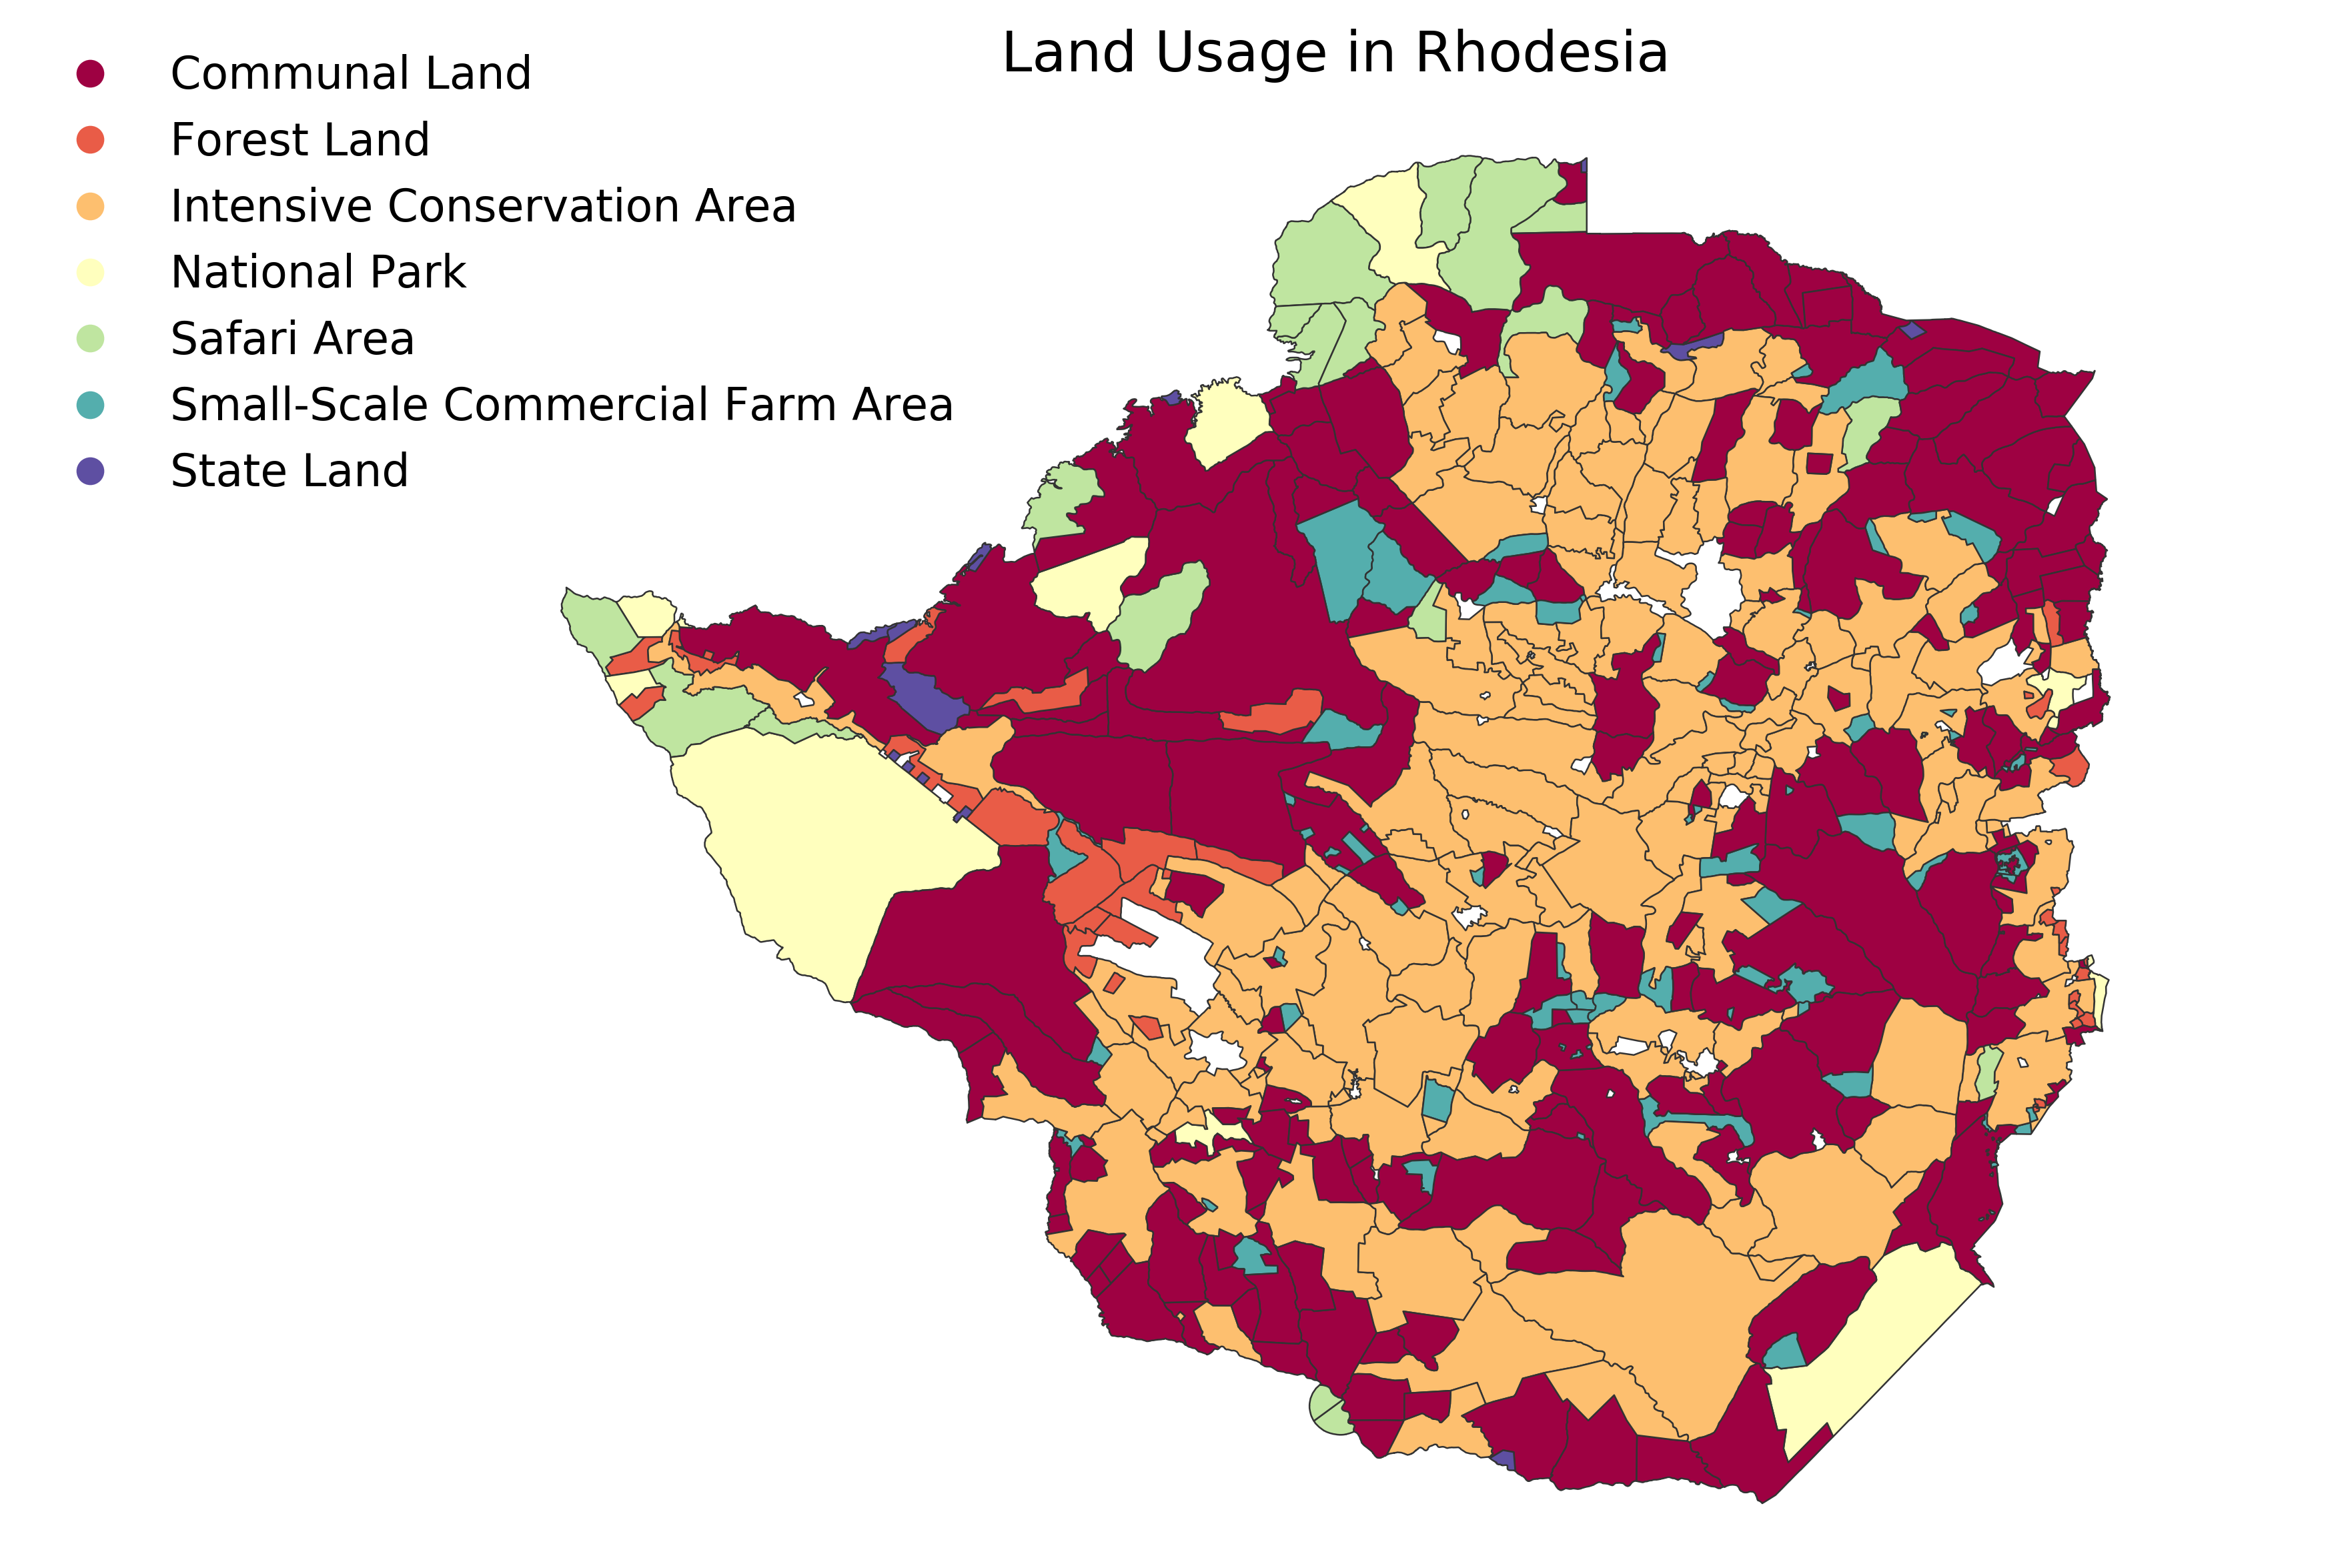

GeoPandas extiende pandas para trabajar con **datos espaciales vectoriales** (puntos, l√≠neas y pol√≠gonos) en un mismo DataFrame que conoce su **sistema de referencia de coordenadas (CRS)**. Esto nos permite analizar y mapear fen√≥menos ambientales y geof√≠sicos con un flujo de trabajo claro y reproducible.

Beneficios clave:
- Une *atributos tabulares* (como en pandas) con *geometr√≠as* y *CRS* en una sola estructura (GeoDataFrame).
- Soporta operaciones espaciales comunes: *join espacial* (¬øen qu√© pol√≠gono cae un punto?)
- Calcula *√°reas y longitudes* correctamente al reproyectar a un CRS adecuado (p. ej., igual-√°rea).
- Lee y escribe formatos est√°ndar: *Shapefile*, *GeoJSON*, *GeoPackage*, entre otros.
- Se integra con *NumPy/pandas* para estad√≠sticas y con *Matplotlib* para mapas r√°pidos (coropletas, capas superpuestas).
- Favorece la **reproducibilidad**: mismo c√≥digo + mismos datos ‚áí mismo resultado/cartograf√≠a.

Ejemplos t√≠picos en el curso:
- Asignar **estaciones** a **municipios/cuencas** (join espacial) y resumir promedios por pol√≠gono.
- Construir **zonas de influencia** (buffers) alrededor de pozos, sensores o fuentes de emisi√≥n.
- **Recortar** capas a un √°rea de estudio y **disolver** l√≠mites por categor√≠a (e.g., continente, ecorregi√≥n).
- Elaborar **mapas tem√°ticos** con leyendas claras y escalas consistentes.


In [32]:
import geopandas as gpd
import geodatasets as gd
import pandas as pd
import matplotlib.pyplot as plt

### ¬øQu√© es *geodatasets*?

`geodatasets` es un paquete en Python que provee acceso r√°pido a **conjuntos de datos geoespaciales de ejemplo**.  
Fue creado para complementar librer√≠as como **GeoPandas**, ofreciendo datos ya listos para usar en pr√°cticas, demos y clases.

---

### ¬øPor qu√© usarlo?

- Permite **cargar datos reales** de manera sencilla sin tener que buscarlos ni descargarlos manualmente.  
- Incluye datos comunes en an√°lisis geogr√°ficos: l√≠mites de pa√≠ses, ciudades, placas tect√≥nicas, cuencas hidrogr√°ficas, etc.  
- Es ideal para **ejercicios de aprendizaje**, ya que los archivos son livianos y estandarizados.  

---

### Ejemplo de uso b√°sico

```python
import geopandas as gpd
import geodatasets

# Listar datasets disponibles
geodatasets.available()

# Cargar l√≠mites mundiales de Natural Earth
world = gpd.read_file(geodatasets.get_path("naturalearth.land"))


In [33]:
# Ejemplos reales incluidos:
world  = gpd.read_file(gd.get_path("nybb"))  # por ejemplo, NY Boroughs (pol√≠gonos)
# Tambi√©n hay otros (ver docs de geodatasets). 

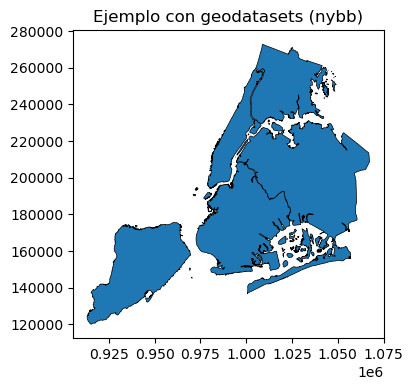

In [34]:
ax = world.plot(edgecolor="black", linewidth=0.5, figsize=(6,4))
ax.set_title("Ejemplo con geodatasets (nybb)")
plt.tight_layout()

### Descarga y uso de datos espaciales desde Natural Earth

En lugar de usar archivos locales, tambi√©n podemos leer **archivos vectoriales directamente desde una URL**.  
Natural Earth provee conjuntos de datos de uso libre en distintos niveles de detalle (1:110m, 1:50m, 1:10m).

---

#### 1. Cargar pa√≠ses y ciudades
```python
url_world  = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
url_cities = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_populated_places_simple.zip"

world  = gpd.read_file(url_world)
cities = gpd.read_file(url_cities)


In [35]:
url_world  = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
url_cities = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_populated_places_simple.zip"

world  = gpd.read_file(url_world)
cities = gpd.read_file(url_cities)

Seleccionamos solo el pol√≠gono de M√©xico usando la columna "ADMIN".

Convertimos su proyecci√≥n a EPSG:4326 (latitud/longitud en grados), para asegurar compatibilidad.

EPSG Geodetic Parameter Dataset.

Luego ajustamos las ciudades al mismo sistema de referencia espacial que M√©xico `to_crs`

Esto es esencial: todas las capas deben tener el mismo CRS para poder hacer operaciones espaciales.

In [36]:
# Filtrar M√©xico
mex = world[world["ADMIN"] == "Mexico"].to_crs("EPSG:4326")

# Asegurar mismo CRS y hacer join espacial (puntos dentro del pol√≠gono)
cities = cities.to_crs(mex.crs)

`sjoin` compara dos GeoDataFrames seg√∫n su geometr√≠a.

Con predicate="within" seleccionamos √∫nicamente las ciudades dentro de la geometr√≠a de M√©xico.

El resultado cities_mx es un subconjunto de ciudades filtradas por ubicaci√≥n.

In [37]:
cities_mx = gpd.sjoin(cities, mex[["ADMIN","geometry"]], how="inner", predicate="within")

Ciudades encontradas en M√©xico: 2


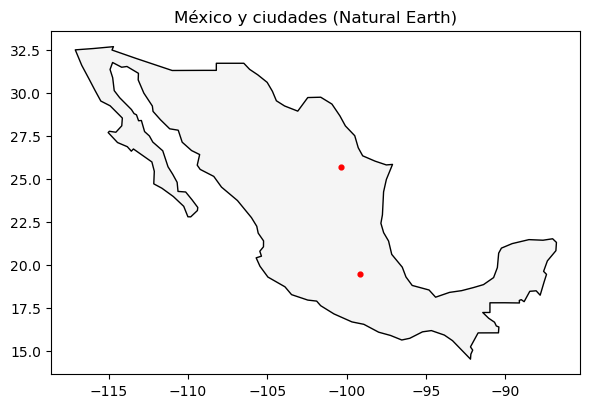

In [38]:
# Mapa r√°pido
ax = mex.plot(figsize=(6,6), color="whitesmoke", edgecolor="black")
cities_mx.plot(ax=ax, markersize=12, color="red")
ax.set_title("M√©xico y ciudades (Natural Earth)")
plt.tight_layout()
print("Ciudades encontradas en M√©xico:", len(cities_mx))

### 2) Medir √°reas correctamente
Para √°reas y distancias se recomienda un **CRS proyectado** (en metros).  
Usaremos un CRS global de **igual √°rea** para calcular el √°rea de M√©xico (km¬≤).

In [39]:
# Proyectar a igual-√°rea global y calcular √°rea
mex_eq = mex.to_crs("EPSG:6933")
area_km2 = float(mex_eq.area.sum() / 1e6)
print("√Årea de M√©xico (km¬≤):", round(area_km2, 0))

√Årea de M√©xico (km¬≤): 1969359.0


### 3) Buffers de 100 km alrededor de algunas ciudades
Creamos zonas de influencia de **100 km**. Para buffers se usa un CRS en **metros** (por ejemplo **EPSG:3857**).  
Luego recortamos los buffers al l√≠mite de M√©xico y los dibujamos.


In [40]:
# Elegir algunas ciudades (por simplicidad, las primeras 6)
sample = cities_mx
print(sample)

     scalerank  natscale  labelrank       featurecla         name namepar  \
196          1       300          2  Admin-1 capital    Monterrey    None   
224          0       600          2  Admin-0 capital  Mexico City    None   

         namealt    nameascii  adm0cap  capalt  ... pop_other  rank_max  \
196         None    Monterrey        0       0  ...   3225636        12   
224  Ciudad de M  Mexico City        1       0  ...  10018444        14   

     rank_min          meganame      ls_name min_zoom       ne_id  \
196        12         Monterrey    Monterrey      3.7  1159151527   
224        14  Ciudad de Mdxico  Mexico City      2.1  1159151587   

                   geometry index_right   ADMIN  
196  POINT (-100.33 25.672)          27  Mexico  
224  POINT (-99.133 19.444)          27  Mexico  

[2 rows x 34 columns]


### Buffers y recortes espaciales

En an√°lisis geoespacial a menudo nos interesa trabajar con **√°reas de influencia** o "zonas cercanas" a un conjunto de puntos.  
Para eso se utiliza el m√©todo `.buffer()`, que genera un pol√≠gono alrededor de cada geometr√≠a a una distancia fija.  

---

#### 1. Crear un buffer
```python
buf = sample_3857.buffer(100_000)


In [41]:
# Trabajar en metros para el buffer
mex_3857    = mex.to_crs(3857)
sample_3857 = sample.to_crs(3857)

In [42]:
# Buffer de 100 km y recorte al pol√≠gono de M√©xico
buf = sample_3857.buffer(100_000)

`overlay` hace operaciones entre capas geoespaciales.

Con `how="intersection"` obtenemos √∫nicamente la parte del buffer que cae dentro de M√©xico.

Esto evita que los buffers se extiendan fuera del pol√≠gono del pa√≠s.

In [43]:
buf_gdf = gpd.GeoDataFrame(geometry=buf, crs=sample_3857.crs)
buf_clip = gpd.overlay(buf_gdf, mex_3857, how="intersection")

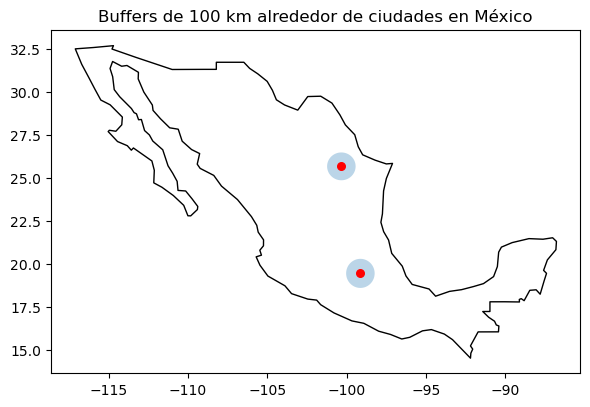

In [44]:
# Volver a geogr√°ficas para graficar junto con el pa√≠s
buf_geo    = buf_clip.to_crs(mex.crs)
sample_geo = sample_3857.to_crs(mex.crs)
# Mapa final
ax = mex.plot(figsize=(6,6), color="white", edgecolor="black")
buf_geo.plot(ax=ax, alpha=0.3)
sample_geo.plot(ax=ax, color="red", markersize=30)
ax.set_title("Buffers de 100 km alrededor de ciudades en M√©xico")
plt.tight_layout()


### 4) Qu√© observar
- El **join espacial** asigna correctamente las ciudades a M√©xico.  
- Con un CRS proyectado, los **buffers** quedan en kil√≥metros reales.  
- El **√°rea** cambia si mides en geogr√°ficas; usa igual-√°rea para reportes.

 ## **<font color="DodgerBlue"> Ejemplo geocient√≠fico: Sismos recientes y su relaci√≥n con l√≠mites de placas </font>**

Objetivo (‚âà25‚Äì35 min):
- Cargar **sismos reales** (USGS) y **l√≠mites de placas**.
- Calcular **distancia al l√≠mite de placa m√°s cercano**.
- Mapear y hacer un recuento por pa√≠s.

Qu√© ver√°s:
- Lectura directa desde URLs.
- `GeoDataFrame`, CRS, `sjoin_nearest` y choropleth sencillo.

### Datos s√≠smicos del USGS en formato GeoJSON

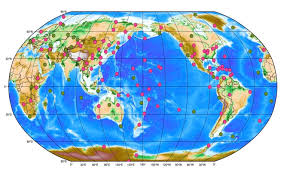

El **United States Geological Survey (USGS)** publica en tiempo real cat√°logos de sismos globales en distintos formatos.  
Uno de los m√°s pr√°cticos es **GeoJSON**, que combina datos tabulares con informaci√≥n geoespacial (latitud/longitud como geometr√≠as).

---

In [45]:
# Sismos M>=4.5 del √∫ltimo mes (GeoJSON)
url_eq = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_month.geojson"
eq = gpd.read_file(url_eq)

### L√≠mites de placas tect√≥nicas (PB2002)

Adem√°s de fronteras pol√≠ticas y ciudades, tambi√©n podemos trabajar con **datos geol√≥gicos globales**.  
Un ejemplo cl√°sico es el conjunto **PB2002** de Bird (2003), que contiene los principales **l√≠mites de placas tect√≥nicas**.

---

Este archivo proviene de un repositorio de GitHub que recopila los l√≠mites de placas en formato GeoJSON.

Incluye segmentos de bordes de placas como l√≠neas (LineString).

Cada segmento est√° etiquetado por tipo de l√≠mite:

Divergente (expansi√≥n, dorsales oce√°nicas).

Convergente (subducci√≥n, colisiones).

Transformante (fallas como San Andr√©s).

In [46]:
# L√≠mites de placas (l√≠neas, GeoJSON)
url_plates = "https://raw.githubusercontent.com/fraxen/tectonicplates/master/GeoJSON/PB2002_boundaries.json"
plates = gpd.read_file(url_plates)

In [47]:
# Campos √∫tiles
eq["time"] = pd.to_datetime(eq["time"], unit="ms", errors="coerce")
eq = eq.to_crs("EPSG:4326")
plates = plates.to_crs(eq.crs)

print("Sismos cargados:", len(eq))
print("L√≠mites de placa:", len(plates))

Sismos cargados: 633
L√≠mites de placa: 241


In [48]:
# 2) Distancia al l√≠mite m√°s cercano (en km)
eq_m     = eq.to_crs(3857)
plates_m = plates.to_crs(3857)

### Distancia de los sismos a los l√≠mites de placas

Una aplicaci√≥n t√≠pica en geociencias es calcular qu√© tan cerca est√° un sismo de un l√≠mite tect√≥nico.  
Con `GeoPandas` podemos hacerlo con un *spatial join*.

---

#### 1. Uni√≥n espacial por cercan√≠a
```python
near = gpd.sjoin_nearest(
    eq_m[["geometry"]],
    plates_m[["geometry"]],
    how="left",
    distance_col="dist_m"
)


In [49]:
near = gpd.sjoin_nearest(
    eq_m[["geometry"]],
    plates_m[["geometry"]],
    how="left",
    distance_col="dist_m"
)

# Colapsa empates: una distancia (m√≠nima) por √≠ndice de sismo
dist_km = (near["dist_m"]
           .groupby(near.index)   # √≠ndice del GeoDataFrame izquierdo (eq_m)
           .min()
           .rename("dist_km") / 1000.0)

# Alinea por √≠ndice y agrega a eq
eq = eq.join(dist_km)
eq["near_plate"] = eq["dist_km"] <= 100.0


`sjoin_nearest` busca, para cada sismo (`eq_m`), el segmento de l√≠mite m√°s cercano en plates_m.

Guarda la distancia en una nueva columna dist_m (en metros, porque usamos CRS proyectado EPSG:3857).

Puede haber empates si un sismo est√° equidistante a dos segmentos.

Para cada sismo, tomamos la distancia m√≠nima. `min`

Convertimos de metros a kil√≥metros.

### Mapa r√°pido

Pintamos los sismos: c√≠rculos m√°s oscuros si est√°n cerca de un l√≠mite de placa.

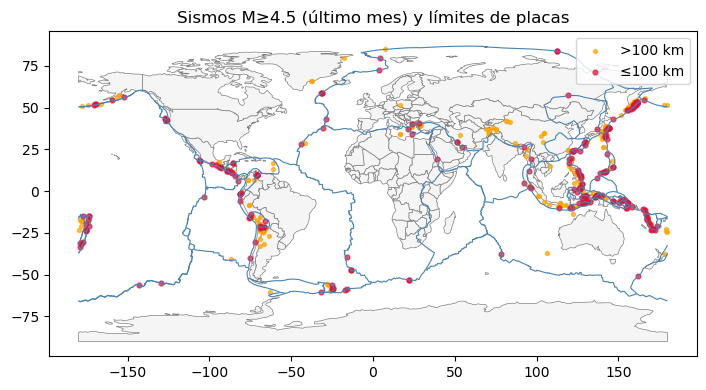

In [50]:
fig, ax = plt.subplots(figsize=(8,4))
world.plot(ax=ax, color="whitesmoke", edgecolor="gray", linewidth=0.5)
plates.plot(ax=ax, color="steelblue", linewidth=0.8)
# dividmos en dos grupos, cercanos y lejanos a los 100 km
eq_close = eq[eq["near_plate"]]
eq_far   = eq[~eq["near_plate"]]

eq_far.plot(ax=ax, markersize=8, color="orange", alpha=0.7, label=">100 km")
eq_close.plot(ax=ax, markersize=12, color="crimson", alpha=0.7, label="‚â§100 km")

ax.set_title("Sismos M‚â•4.5 (√∫ltimo mes) y l√≠mites de placas")
ax.legend()
plt.tight_layout()

### Sismos por pa√≠s con *spatial join*

Una vez que tenemos los sismos en un `GeoDataFrame`, podemos preguntarnos:  
üëâ ¬øEn qu√© pa√≠s cay√≥ cada evento?

---

`sjoin` combina dos capas: sismos (puntos) y pa√≠ses (pol√≠gonos).

Con `predicate="within"` buscamos qu√© punto est√° dentro de qu√© pol√≠gono.

El resultado a√±ade la columna `"ADMIN"` (nombre del pa√≠s) a cada sismo.

`how="left"` asegura que mantenemos todos los sismos, aunque alguno quede fuera de los pol√≠gonos.

In [51]:
# 3) Join espacial sismos‚Üípa√≠ses
eq_countries = gpd.sjoin(
    eq[["geometry","mag","place","time"]].to_crs(world.crs),
    world[["ADMIN","geometry"]],
    how="left",
    predicate="within"
)
# contamos por cada pais el numero de sismos
counts = eq_countries.groupby("ADMIN", dropna=True).size().rename("n_eq").reset_index()
# unir con el mapa mundial
world_eq = world.merge(counts, on="ADMIN", how="left").fillna({"n_eq":0})

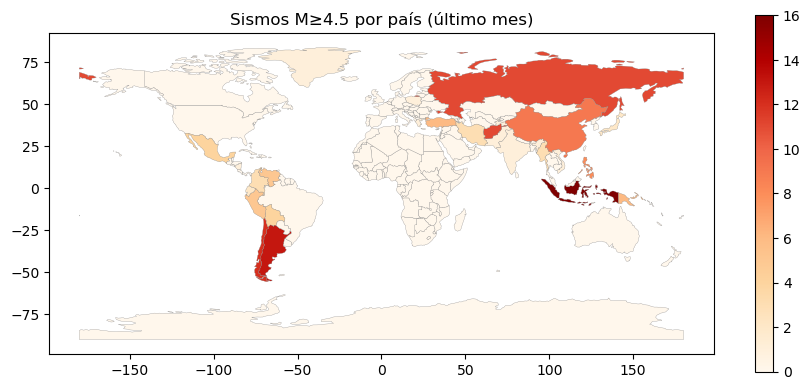

               ADMIN  n_eq
10         Indonesia    16
1          Argentina    13
3              Chile    12
0        Afghanistan    11
21            Russia    11
4              China     9
19       Philippines     8
23            Turkey     6
17  Papua New Guinea     6
24         Venezuela     5


In [52]:
# Mapa coropl√©tico
fig, ax = plt.subplots(figsize=(9,4))
world_eq.plot(column="n_eq", ax=ax, legend=True, cmap="OrRd",
              edgecolor="gray", linewidth=0.2, missing_kwds={"color":"lightgray"})
ax.set_title("Sismos M‚â•4.5 por pa√≠s (√∫ltimo mes)")
plt.tight_layout(); plt.show()

# Vista r√°pida de top-10
top10 = counts.sort_values("n_eq", ascending=False).head(10)
print(top10)


### Gu√≠a: Lagos por pa√≠s con GeoPandas (Natural Earth)

Objetivo: cargar volcanes y pa√≠ses, asignar cada volc√°n a un pa√≠s con un join espacial, contar volcanes por pa√≠s y mapear el resultado.

---

#### Paso 1. Carga los datos de lagos (puntos)
- Lee el dataset de Natural Earth (10m):  
  `https://naciscdn.org/naturalearth/10m/physical/ne_10m_lakes.zip`
- Guarda el resultado en un GeoDataFrame llamado `lakes`.

Sugerencia: revisa columnas disponibles y el `crs` con `lakes.head()` y `lakes.crs`.

---



#### Paso 2.  Reproyecta a un CRS igual-√°rea global (p. ej., EPSG:6933) para que las √°reas salgan en m¬≤ coherentes.

Sugerencia: confirma que existe la columna `ADMIN` (nombre oficial del pa√≠s).

---

### Paso 3 ‚Äî Intersecci√≥n espacial

Usa `gpd.overlay(lagos, pa√≠ses, how="intersection")` para recortar cada pol√≠gono de lago al pa√≠s donde cae (si cruza fronteras, se parte).


### Paso 4 ‚Äî √Årea y agregaci√≥n

Calcula area_km2 = geometry.area / 1e6 en la capa intersectada.

Agrupa por ADMIN (nombre del pa√≠s) y suma area_km2 ‚Üí obt√©n una tabla area_lagos_por_pais.

### Paso 5 ‚Äî Unir y mapear

Haz un merge de la tabla de √°reas al GeoDataFrame de pa√≠ses.

Mapa coropl√©tico con column="area_lagos_km2", paleta legible (p. ej., "Blues"), leyenda y bordes sutiles.

(Opcional) Superpone los contornos de lagos para referencia.

### Paso 6 ‚Äî Preguntas r√°pidas y adicionales

¬øQu√© pa√≠ses concentran m√°s √°rea de lagos? Muestra el top 10.

¬øC√≥mo cambian los resultados si usas un CRS que no es igual-√°rea?

Filtra solo Am√©rica y repite; compara con el mundo.